In [1]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initialize_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        centroids = np.array([[6.2,3.2], [6.6,3.7], [6.5,3.0]])
       
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        row_norm = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            
            row_norm1 = norm(X - centroids[k, :], axis=1, ord=2)
            row_norm[:, k] = row_norm1
            distance[:, k] = np.square(row_norm1)
        return distance, row_norm

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            
            old_centroids = self.centroids

            distance, row_norm = self.compute_distance(X, old_centroids)
            self.distance = distance
            self.row_norm = row_norm
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            print('Running iteration ' + str(i + 1))
            
            if np.all(old_centroids == self.centroids):
                print('converged on iteration ' + str(i + 1))
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

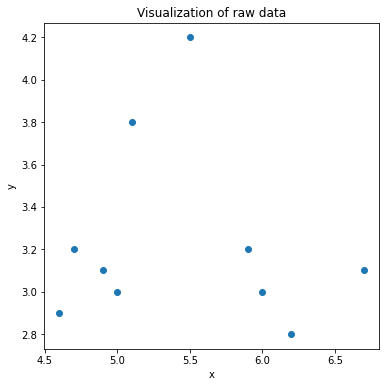

In [3]:
# Import the data
df = pd.read_csv('1.2 data.csv', header = None)

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of raw data');

Running iteration 1
Running iteration 2
              x      y
mu1(red)    4.8  3.050
mu2(green)  5.3  4.000
mu3(blue)   6.2  3.025


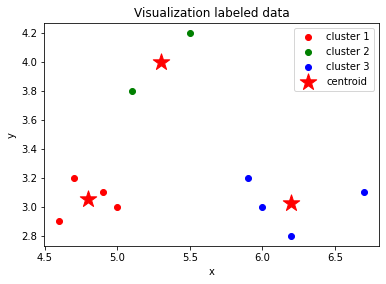

In [9]:
# Standardize the data
X_std = np.array(df)

# Run local implementation of kmeans
km = Kmeans(n_clusters=3, max_iter=2)
km.fit(X_std)
centroids = km.centroids
cent_df = pd.DataFrame(centroids,  columns = ['x', 'y'], index=["mu1(red)", "mu2(green)", "mu3(blue)"])

print(cent_df)

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='green', label='cluster 2')
plt.scatter(X_std[km.labels == 2, 0], X_std[km.labels == 2, 1],
            c='blue', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization labeled data');
ax.set_aspect('equal');




In [10]:
print(cent_df)
df1 = pd.DataFrame(km.row_norm.round(decimals = 3), columns=["mu1(red)", "mu2(green)", "mu3(blue)"], index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
df1.transpose()

              x      y
mu1(red)    4.8  3.050
mu2(green)  5.3  4.000
mu3(blue)   6.2  3.025


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
mu1(red),0.729,0.633,1.094,0.472,1.08,0.242,0.281,1.530,0.633,0.846
mu2(green),1.077,1.581,1.565,1.281,0.00,1.300,1.253,1.628,0.566,1.300
mu3(blue),0.604,1.851,0.292,1.768,1.57,1.451,1.557,0.292,1.595,0.453
